In [1]:
import numpy as np
import random
import time
import math
import random
import os
import json
import sys
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Network and measures
from to_get_data.net_construction_vis_measures import *

from to_get_data.generate_database import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *

from model_class.Variety import Variety
from model_class.UD import *
from model_class.UD_aleatory_inheritance import *

# General (aleatory and with inheritance)

## Endogamy

In [2]:
#ENDOGAMY 
#Parameters endogamy
experiments = 2
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 600 #steps of the simulation
inheritance = [0,25,50,75,100, 'False']
data_inherit_endo = {}
for inherit in inheritance:
    print(f"Experiments with inheritance {inherit}")
    #Lists to store experiments' data
    data_endo_mean_ud = []
    data_endo_com_level = []
    data_endo_total_varieties = []
    for exp in range(1, experiments+1):
        #### Initialization endogamy
        ## Communities
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(communities)
        if inherit != 'False':
            UD_endogamy.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_endogamy(id_ud, media, communities.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (30)]
                for ud in UD_endogamy.uds.values():
                    for _ in range(10):
                        ud.varieties.append(random.choice(initial_varieties))
            #### Simulation endogamy
            for i in range (1, (t)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, inherit, True)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)      
            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_endogamy.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_endo_mean_ud.append(np.mean(varieties_per_UD))
            data_endo_com_level.append(len(set(total_varieties)))
            data_endo_total_varieties.append(total_varieties)
        #data_inherit_endo[inherit] = [data_endo_mean_ud, data_endo_com_level, data_endo_total_varieties]
        else:
            UD_endogamy_al_inh.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_endogamy_al_inh(id_ud, media, communities.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy_al_inh.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (30)]
                for ud in UD_endogamy_al_inh.uds.values():
                    for _ in range(10):
                        ud.varieties.append(random.choice(initial_varieties))
            #### Simulation endogamy
            for i in range (1, (t)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy_al_inh.uds.items() if ud.activa}
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, varieties_list, True)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)      
            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_endogamy_al_inh.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_endo_mean_ud.append(np.mean(varieties_per_UD))
            data_endo_com_level.append(len(set(total_varieties)))
            data_endo_total_varieties.append(total_varieties)
        data_inherit_endo[inherit] = [data_endo_mean_ud, data_endo_com_level, data_endo_total_varieties]
# Folder
folder_name = 'results_inheritance'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Inherit data
inherit_endo_path = os.path.join(folder_name, 'inherit_data_endo.json')
# Save
with open(inherit_endo_path, 'w') as json_file:
    json.dump(data_inherit_endo, json_file, indent=4)
# Confirmation message
print("Data saved successfully to", inherit_endo_path)

Experiments with inheritance 0
939
447
Experiments with inheritance 25
1595
1733
Experiments with inheritance 50
1408
1361
Experiments with inheritance 75
1112
1608
Experiments with inheritance 100
466
705
Experiments with inheritance False
686
935
Data saved successfully to results_inheritance\inherit_data_endo.json


In [3]:
# Load
with open(inherit_endo_path, 'r') as json_file:
        loaded_data_inherit_endo = json.load(json_file)

In [19]:
for i in loaded_data_inherit_endo:
    print(i)

0
25
50
75
100
False


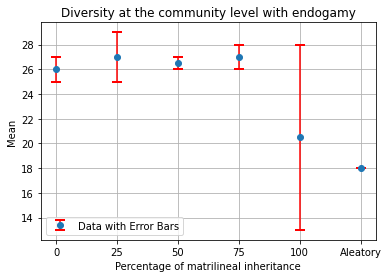

In [4]:
## Data and plot from loaded data
mean_div_com = []
std_div_com = []
inheritance = ['0','25','50','75','100', 'False']
for i in inheritance:
    mean_div_com.append(np.mean(loaded_data_inherit_endo[i][1]))
    std_div_com.append(np.std(loaded_data_inherit_endo[i][1]))
#Plot
inheritance_possibilities = ['0','25','50','75','100', 'Aleatory']
plt.errorbar(inheritance_possibilities, mean_div_com, yerr=std_div_com, fmt='o', capsize=5, capthick=2, ecolor='red', label='Data with Error Bars')
plt.xlabel('Percentage of matrilineal inheritance')
plt.ylabel('Mean')
plt.title('Diversity at the community level with endogamy')
plt.legend()
plt.grid(True)
plt.show()

## Dual organization

In [22]:
#DUAL ORGANIZATION
#Parameters dual_organization
experiments = 2
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 201 #steps of the simulation
inheritance = [0,25,50,75,100, 'False']
data_inherit_dual = {}
for inherit in inheritance:
    print(f"Experiments with inheritance {inherit}")
    data_dual_mean_ud = []
    data_dual_com_level = []
    data_dual_total_varieties = []
    for exp in range(1,experiments+1):
        #### Initialization dual_organization
        ## Communities
        clans = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 clans
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(clans)
        random.shuffle(communities)
        if inherit != 'False':
            UD_dual_organization.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_dual_organization(id_ud, media, communities.pop(), clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_dual_organization.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (30)]
                for ud in UD_dual_organization.uds.values():
                    for _ in range(10):
                        ud.varieties.append(random.choice(initial_varieties))
            #### Simulation
            for i in range (1, (t)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization.uds.items() if ud.activa}
                if not uds_copy:
                    print("acabo")
                    break
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, inherit, True, False)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_dual_organization.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_dual_mean_ud.append(np.mean(varieties_per_UD))
            data_dual_com_level.append(len(set(total_varieties)))
            data_dual_total_varieties.append(total_varieties)
        #data_inherit_dual[inherit] = [data_dual_mean_ud, data_dual_com_level, data_dual_total_varieties]
        else:
            UD_dual_organization_al_inh.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_dual_organization_al_inh(id_ud, media, communities.pop(), clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_dual_organization_al_inh.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (30)]
                for ud in UD_dual_organization_al_inh.uds.values():
                    for _ in range(10):
                        ud.varieties.append(random.choice(initial_varieties))
            #### Simulation
            for i in range (1, (t)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization_al_inh.uds.items() if ud.activa}
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, varieties_list, True, False)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)

            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_dual_organization_al_inh.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_dual_mean_ud.append(np.mean(varieties_per_UD))
            data_dual_com_level.append(len(set(total_varieties)))
            data_dual_total_varieties.append(total_varieties)
    data_inherit_dual[inherit] = [data_dual_mean_ud, data_dual_com_level, data_dual_total_varieties]
# Folder
folder_name = 'results_inheritance'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Inherit data
inherit_dual_path = os.path.join(folder_name, 'inherit_data_dual.json')
# Save
with open(inherit_dual_path, 'w') as json_file:
    json.dump(data_inherit_dual, json_file, indent=4)
# Confirmation message
print("Data saved successfully to", inherit_dual_path)

Experiments with inheritance 0
114
54
Experiments with inheritance 25
58
55
Experiments with inheritance 50
105
245
Experiments with inheritance 75
100
181
Experiments with inheritance 100
110
102
Experiments with inheritance False
105
86
Data saved successfully to results_inheritance\inherit_data_dual.json


In [23]:
# Load
with open(inherit_dual_path, 'r') as json_file:
        loaded_data_inherit_dual = json.load(json_file)

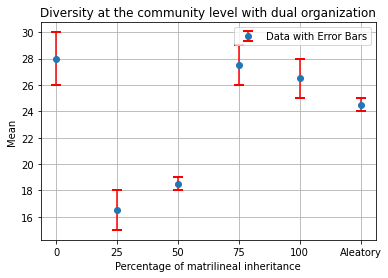

In [25]:
## Data and plot
mean_div_com = []
std_div_com = []
inheritance = ['0','25','50','75','100', 'False']
for i in inheritance:
    #print(i)
    mean_div_com.append(np.mean(loaded_data_inherit_dual[i][1]))
    std_div_com.append(np.std(loaded_data_inherit_dual[i][1]))
#Plot
inheritance_possibilities = ['0','25','50','75','100', 'Aleatory']
plt.errorbar(inheritance_possibilities, mean_div_com, yerr=std_div_com, fmt='o', capsize=5, capthick=2, ecolor='red', label='Data with Error Bars')
plt.xlabel('Percentage of matrilineal inheritance')
plt.ylabel('Mean')
plt.title('Diversity at the community level with dual organization')
plt.legend()
plt.grid(True)
plt.show()

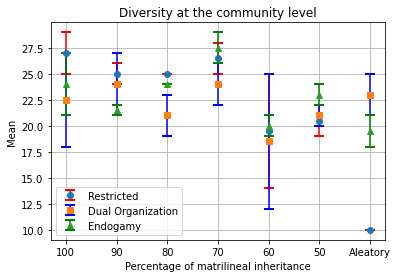

## Restricted

In [26]:
#UD_restricted
#Parameters restricted_exchange
experiments = 2
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
#random.seed(42) # Random seed
t = 201 #steps of the simulation
inheritance = [0,25,50,75,100, 'False']
data_inherit_restricted = {}
for inherit in inheritance:
    print(f"Experiments with inheritance {inherit}")
    data_restricted_mean_ud = []
    data_restricted_com_level = []
    data_restricted_total_varieties = []
    for exp in range (1, experiments+1):
        #### Initialization restricted_exchange
        ## Communities
        clans = (list(range(1, 3 + 1)) * (iniciais // 3)) # Just 3 clans
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(clans)
        random.shuffle(communities)
        if inherit != 'False':
            UD_restricted.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_restricted(id_ud, media, communities.pop(), clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_restricted.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (30)]
                for ud in UD_restricted.uds.values():
                    for _ in range(10):
                        ud.varieties.append(random.choice(initial_varieties))
            #### Simulation
            for i in range (1, (t)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_restricted.uds.items() if ud.activa}
                if not uds_copy:
                    print("acabo")
                    break
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, inherit, True, False)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)

            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_restricted.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_restricted_mean_ud.append(np.mean(varieties_per_UD))
            data_restricted_com_level.append(len(set(total_varieties)))
            data_restricted_total_varieties.append(total_varieties)
        #data_inherit_restricted[inherit] = [data_restricted_mean_ud, data_restricted_com_level, data_restricted_total_varieties]
        else:
            UD_restricted_al_inh.uds = {}
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_restricted_al_inh(id_ud, media, communities.pop(), clans.pop()))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_restricted_al_inh.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_restricted_al_inh.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))
            #### Simulation
            for i in range (1, (t)):
                uds_copy = {id_ud: ud for id_ud, ud in UD_restricted_al_inh.uds.items() if ud.activa}
                if not uds_copy:
                    print("acabo")
                    break
                # Cycle: 
                varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
                for id_ud, ud in uds_copy.items():
                    ud.ter_filho()
                    ud.buscar_ud(media, varieties_list, True, False)
                    ud.incrementar_idade()
                    ud.death_probability(prob_morte)
            print(len([ud for id, ud in uds_copy.items() if ud.activa]))
            #Get the distribution, community diversity and mean by UD
            total_varieties = []
            varieties_per_UD = []
            for ud in [ud for ud in UD_restricted_al_inh.uds.values() if ud.activa ==True]:
                varieties_per_UD.append(len(ud.varieties))
                for variety in ud.varieties:
                    total_varieties.append(variety.variety_id)
            #mean_ud = np.mean(varieties_per_UD)
            #diversity_comm_level = len(set(total_varieties))
            data_restricted_mean_ud.append(np.mean(varieties_per_UD))
            data_restricted_com_level.append(len(set(total_varieties)))
            data_restricted_total_varieties.append(total_varieties)
        data_inherit_restricted[inherit] = [data_restricted_mean_ud, data_restricted_com_level, data_restricted_total_varieties]
# Folder
folder_name = 'results_inheritance'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Inherit data
inherit_restricted_path = os.path.join(folder_name, 'inherit_data_restricted.json')
# Save
with open(inherit_restricted_path, 'w') as json_file:
    json.dump(data_inherit_restricted, json_file, indent=4)
# Confirmation message
print("Data saved successfully to", inherit_restricted_path)

Experiments with inheritance 0
98
81
Experiments with inheritance 25
113
79
Experiments with inheritance 50
109
189
Experiments with inheritance 75
106
67
Experiments with inheritance 100
37
49
Experiments with inheritance False
119
142
Data saved successfully to results_inheritance\inherit_data_restricted.json


In [27]:
# Load
with open(inherit_restricted_path, 'r') as json_file:
        loaded_data_inherit_restricted = json.load(json_file)

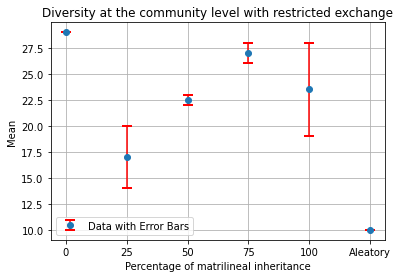

In [28]:
## Data and plot
mean_div_com = []
std_div_com = []
inheritance = ['0','25','50','75','100', 'False']
for i in inheritance:
    #print(i)
    mean_div_com.append(np.mean(loaded_data_inherit_restricted[i][1]))
    std_div_com.append(np.std(loaded_data_inherit_restricted[i][1]))
#Plot
inheritance_possibilities = ['0','25','50','75','100', 'Aleatory']
plt.errorbar(inheritance_possibilities, mean_div_com, yerr=std_div_com, fmt='o', capsize=5, capthick=2, ecolor='red', label='Data with Error Bars')
plt.xlabel('Percentage of matrilineal inheritance')
plt.ylabel('Mean')
plt.title('Diversity at the community level with restricted exchange')
plt.legend()
plt.grid(True)
plt.show()

## To visualize all of them at the same time

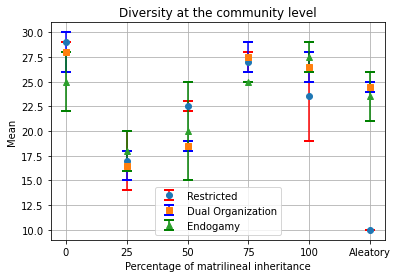

In [29]:
# Lists
mean_div_com_restricted = []
std_div_com_restricted = []
mean_div_com_dual = []
std_div_com_dual = []
mean_div_com_endo = []
std_div_com_endo = []
inheritance = ['0','25','50','75','100', 'False']
# Mean and std
for i in inheritance:
    mean_div_com_restricted.append(np.mean(loaded_data_inherit_restricted[i][1]))
    std_div_com_restricted.append(np.std(loaded_data_inherit_restricted[i][1]))
    mean_div_com_dual.append(np.mean(loaded_data_inherit_dual[i][1]))
    std_div_com_dual.append(np.std(loaded_data_inherit_dual[i][1]))
    mean_div_com_endo.append(np.mean(loaded_data_inherit_endo[i][1]))
    std_div_com_endo.append(np.std(loaded_data_inherit_endo[i][1]))

inheritance_possibilities = ['0','25','50','75','100', 'Aleatory']
#Plot
plt.errorbar(inheritance_possibilities, mean_div_com_restricted, yerr=std_div_com_restricted, fmt='o', capsize=5, capthick=2, ecolor='red', label='Restricted')
plt.errorbar(inheritance_possibilities, mean_div_com_dual, yerr=std_div_com_dual, fmt='s', capsize=5, capthick=2, ecolor='blue', label='Dual Organization')
plt.errorbar(inheritance_possibilities, mean_div_com_endo, yerr=std_div_com_endo, fmt='^', capsize=5, capthick=2, ecolor='green', label='Endogamy')
plt.xlabel('Percentage of matrilineal inheritance')
plt.ylabel('Mean')
plt.title('Diversity at the community level')
plt.legend()
plt.grid(True)
plt.show()

# With inheritance

## Endogamy

In [8]:
#ENDOGAMY 
#Parameters endogamy
experiments = 2
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 201 #steps of the simulation
inheritance = [100,90,80,70,60,50, False]
# For the data
# data_endo_mean_ud = []
# data_endo_com_level = []
# data_endo_total_varieties = []
data_inherit_endo = {}
for inherit in inheritance:
    data_endo_mean_ud = []
    data_endo_com_level = []
    data_endo_total_varieties = []
    for exp in range(1, experiments+1):
        #### Initialization endogamy
        ## Communities
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(communities)
        UD_endogamy.uds = {}
        instancias_ud = []
        for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD_endogamy(id_ud, media, communities.pop()))
        ## Varieties
        limited_varieties = True
        if limited_varieties == False:
            for id_ud, ud in UD_endogamy.uds.items():
                for _ in range(3):
                    ud.varieties.append(Variety())
        else:
            initial_varieties = [Variety() for _ in range (10)]
            for ud in UD_endogamy.uds.values():
                for _ in range(3):
                    ud.varieties.append(random.choice(initial_varieties))
        #### Simulation endogamy
        for i in range (1, (t)):
            uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
            if not uds_copy:
                print("acabo")
                break
            # Cycle: 
            for id_ud, ud in uds_copy.items():
                ud.ter_filho()
                ud.buscar_ud(media, inherit, True)
                ud.incrementar_idade()
                ud.death_probability(prob_morte)      
        print(len([ud for id, ud in uds_copy.items() if ud.activa]))
        #Get the distribution, community diversity and mean by UD
        total_varieties = []
        varieties_per_UD = []
        for ud in [ud for ud in UD_endogamy.uds.values() if ud.activa ==True]:
            varieties_per_UD.append(len(ud.varieties))
            for variety in ud.varieties:
                total_varieties.append(variety.variety_id)
        #mean_ud = np.mean(varieties_per_UD)
        #diversity_comm_level = len(set(total_varieties))
        data_endo_mean_ud.append(np.mean(varieties_per_UD))
        data_endo_com_level.append(len(set(total_varieties)))
        data_endo_total_varieties.append(total_varieties)
    data_inherit_endo[inherit] = [data_endo_mean_ud, data_endo_com_level, data_endo_total_varieties]

65
124
21
139
57
113
92
145
134
84
100
89
91
147


In [78]:
data[8][2]

6

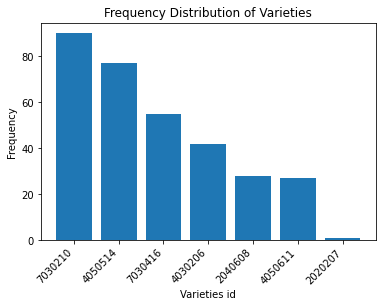

Diversity at the community level: 7 
The mean of varieties by UD is: 4.0


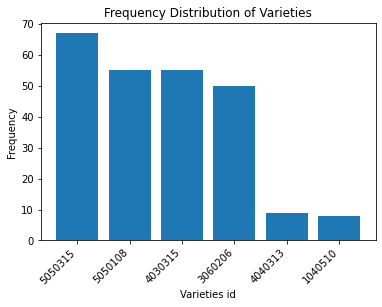

Diversity at the community level: 6 
The mean of varieties by UD is: 4.0


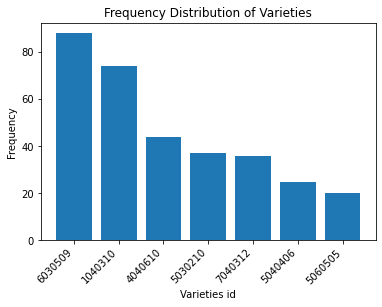

Diversity at the community level: 7 
The mean of varieties by UD is: 4.0


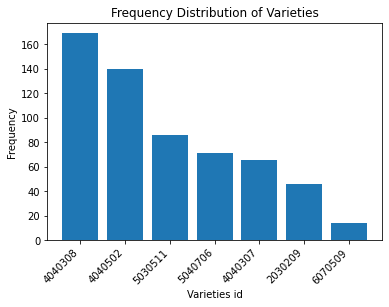

Diversity at the community level: 7 
The mean of varieties by UD is: 4.0


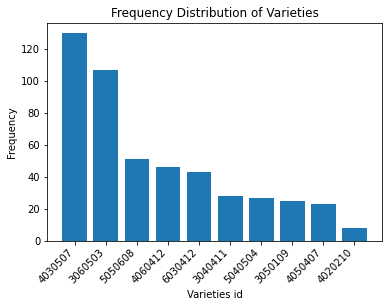

Diversity at the community level: 10 
The mean of varieties by UD is: 4.0


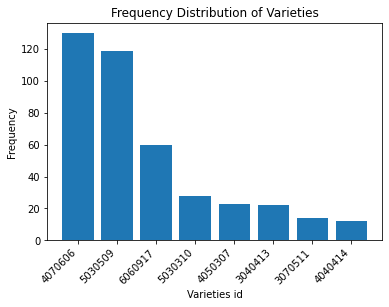

Diversity at the community level: 8 
The mean of varieties by UD is: 4.0


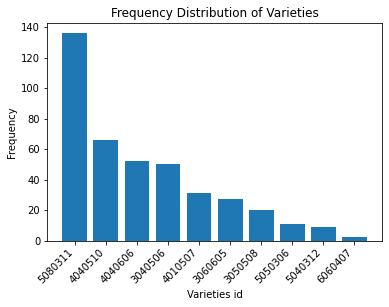

Diversity at the community level: 10 
The mean of varieties by UD is: 4.0


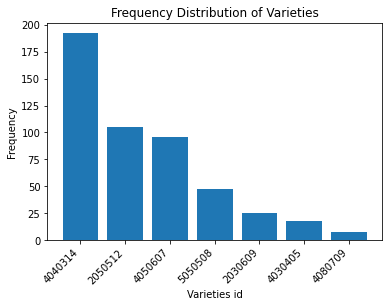

Diversity at the community level: 7 
The mean of varieties by UD is: 4.0


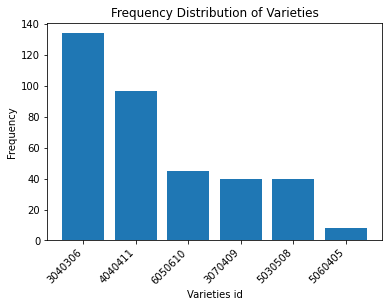

Diversity at the community level: 6 
The mean of varieties by UD is: 4.0


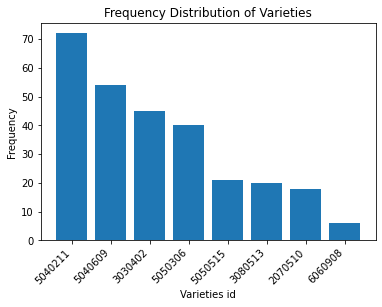

Diversity at the community level: 8 
The mean of varieties by UD is: 4.0


In [86]:
for data in data.values():
    total_varieties = data[0]
    total_varieties = [str(x) for x in total_varieties]
    varieties_counts = Counter(total_varieties)
    varieties_counts = sorted(varieties_counts.items(), key=lambda x: x[1], reverse=True)
    varieties, counts = zip(*varieties_counts)
    # Plot
    plt.bar(varieties, counts)
    plt.xlabel("Varieties id")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.title("Frequency Distribution of Varieties")
    plt.show()
    print(f"Diversity at the community level: {(data[2])} ")
    print(f"The mean of varieties by UD is: {data[1]}")

In [ ]:
for i in listas:
    total_varieties = [str(x) for x in total_varieties]
    varieties_counts = Counter(total_varieties)
    varieties_counts = sorted(varieties_counts.items(), key=lambda x: x[1], reverse=True)
    varieties, counts = zip(*varieties_counts)
    # Plot
    plt.bar(varieties, counts)
    plt.xlabel("Varieties id")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.title("Frequency Distribution of Varieties")
    plt.show()
    print(f"Diversity at the community level: {len(diversity_comm_level)} ")
    print(f"The mean of varieties by UD is: {np.mean(varieties_per_UD)}")

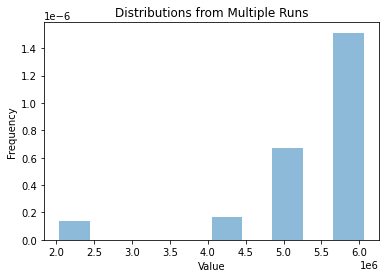

In [42]:
# Visualization
distributions = [total_varieties]
for dist in distributions:
    plt.hist(dist, bins=10, alpha=0.5, density=True)
plt.title("Distributions from Multiple Runs")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [32]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

def js_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    m = 0.5 * (p + q)
    return 0.5 * (distance.entropy(p, m) + distance.entropy(q, m))

# Generate 5 random distributions for demonstration
np.random.seed(42)  # for reproducibility
distributions = [np.random.dirichlet(np.ones(10), size=1)[0] for _ in range(5)]

# Compute pairwise JS divergence
num_runs = len(distributions)
js_divergences = np.zeros((num_runs, num_runs))

for i in range(num_runs):
    for j in range(i + 1, num_runs):
        js_div = js_divergence(distributions[i], distributions[j])
        js_divergences[i, j] = js_divergences[j, i] = js_div

# Compute mean and std of JS divergence
js_mean = np.mean(js_divergences[np.triu_indices(num_runs, 1)])
js_std = np.std(js_divergences[np.triu_indices(num_runs, 1)])

print(f"JS Divergence - Mean: {js_mean}, Std Dev: {js_std}")

# Visualization
for dist in distributions:
    plt.hist(dist, bins=10, alpha=0.5, density=True)
plt.title("Distributions from Multiple Runs")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


AttributeError: module 'scipy.spatial.distance' has no attribute 'entropy'

JS Divergence - Mean: 0.20066710811089922, Std Dev: 0.09502681395927864


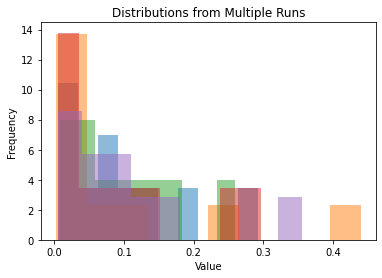

In [41]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

def js_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

# Generate 5 random distributions for demonstration
np.random.seed(42)  # for reproducibility
distributions = [np.random.dirichlet(np.ones(10), size=1)[0] for _ in range(5)]

# Compute pairwise JS divergence
num_runs = len(distributions)
js_divergences = np.zeros((num_runs, num_runs))

for i in range(num_runs):
    for j in range(i + 1, num_runs):
        js_div = js_divergence(distributions[i], distributions[j])
        js_divergences[i, j] = js_divergences[j, i] = js_div

# Compute mean and std of JS divergence
js_mean = np.mean(js_divergences[np.triu_indices(num_runs, 1)])
js_std = np.std(js_divergences[np.triu_indices(num_runs, 1)])

print(f"JS Divergence - Mean: {js_mean}, Std Dev: {js_std}")

# Visualization
for dist in distributions:
    plt.hist(dist, bins=10, alpha=0.5, density=True)
plt.title("Distributions from Multiple Runs")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

JS Divergence - Mean: 0.01646442802981223, Std Dev: 0.0048869733124836424


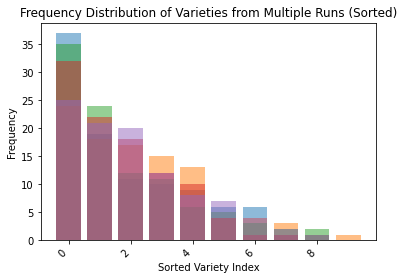

Diversity at the community level: 10
The mean of varieties by UD is: 9.0


In [40]:
import numpy as np
from scipy.stats import entropy
from collections import Counter
import matplotlib.pyplot as plt

def js_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

# Generate 5 random distributions for demonstration with string identifiers
np.random.seed(42)  # for reproducibility
distributions = [np.random.choice(list('ABCDEFGHIJ'), size=100, p=np.random.dirichlet(np.ones(10))) for _ in range(5)]

# Convert distributions to total_varieties with string identifiers
total_varieties = [['var_' + str(x) for x in dist] for dist in distributions]

# Prepare the distributions by counting and sorting frequencies
distributions_counts = []
for dist in total_varieties:
    varieties_counts = Counter(dist)
    sorted_counts = sorted(varieties_counts.values(), reverse=True)
    distributions_counts.append(sorted_counts)

# Normalize the counts
max_length = max(len(counts) for counts in distributions_counts)
normalized_counts = []
for counts in distributions_counts:
    padded_counts = counts + [0] * (max_length - len(counts))
    normalized_counts.append(np.array(padded_counts) / sum(padded_counts))

# Compute pairwise JS divergence
num_runs = len(normalized_counts)
js_divergences = np.zeros((num_runs, num_runs))

for i in range(num_runs):
    for j in range(i + 1, num_runs):
        js_div = js_divergence(normalized_counts[i], normalized_counts[j])
        js_divergences[i, j] = js_divergences[j, i] = js_div

# Compute mean and std of JS divergence
js_mean = np.mean(js_divergences[np.triu_indices(num_runs, 1)])
js_std = np.std(js_divergences[np.triu_indices(num_runs, 1)])

print(f"JS Divergence - Mean: {js_mean}, Std Dev: {js_std}")

# Visualization of distributions
for dist in total_varieties:
    varieties_counts = Counter(dist)
    varieties, counts = zip(*sorted(varieties_counts.items(), key=lambda x: x[1], reverse=True))
    plt.bar(range(len(counts)), counts, alpha=0.5)

plt.xlabel("Sorted Variety Index")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.title("Frequency Distribution of Varieties from Multiple Runs (Sorted)")
plt.show()

# Example of diversity at the community level and mean of varieties per UD (User Defined)
diversity_comm_level = set(item for sublist in total_varieties for item in sublist)
varieties_per_UD = [len(Counter(dist)) for dist in total_varieties]

print(f"Diversity at the community level: {len(diversity_comm_level)}")
print(f"The mean of varieties by UD is: {np.mean(varieties_per_UD)}")


## Dual organization

In [46]:
#DUAL ORGANIZATION
#Parameters dual_organization
experiments = 2
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 201 #steps of the simulation
inheritance = [100,90,80,70,60,50]
data_inherit_dual = {}
for inherit in inheritance:
    data_dual_mean_ud = []
    data_dual_com_level = []
    data_dual_total_varieties = []
    for exp in range(1,experiments+1):
        #### Initialization dual_organization
        ## Communities
        clans = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 clans
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(clans)
        random.shuffle(communities)
        UD_dual_organization.uds = {}
        instancias_ud = []
        for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD_dual_organization(id_ud, media, communities.pop(), clans.pop()))
        ## Varieties
        limited_varieties = True
        if limited_varieties == False:
            for id_ud, ud in UD_dual_organization.uds.items():
                for _ in range(3):
                    ud.varieties.append(Variety())
        else:
            initial_varieties = [Variety() for _ in range (10)]
            for ud in UD_dual_organization.uds.values():
                for _ in range(3):
                    ud.varieties.append(random.choice(initial_varieties))
        #### Simulation
        for i in range (1, (t)):
            uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization.uds.items() if ud.activa}
            if not uds_copy:
                print("acabo")
                break
            for id_ud, ud in uds_copy.items():
                ud.ter_filho()
                ud.buscar_ud(media, inherit, True, False)
                ud.incrementar_idade()
                ud.death_probability(prob_morte)
        print(len([ud for id, ud in uds_copy.items() if ud.activa]))
        #Get the distribution, community diversity and mean by UD
        total_varieties = []
        varieties_per_UD = []
        for ud in [ud for ud in UD_dual_organization.uds.values() if ud.activa ==True]:
            varieties_per_UD.append(len(ud.varieties))
            for variety in ud.varieties:
                total_varieties.append(variety.variety_id)
        #mean_ud = np.mean(varieties_per_UD)
        #diversity_comm_level = len(set(total_varieties))
        data_dual_mean_ud.append(np.mean(varieties_per_UD))
        data_dual_com_level.append(len(set(total_varieties)))
        data_dual_total_varieties.append(total_varieties)
    data_inherit_dual[inherit] = [data_dual_mean_ud, data_dual_com_level, data_dual_total_varieties]

87
101
78
24
71
104
64
80
181
33
50
50


In [ ]:
#Codigo para sacar datos y demas.

## Restricted exchange

In [47]:
#UD_restricted
#Parameters restricted_exchange
experiments = 2
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
#random.seed(42) # Random seed
t = 201 #steps of the simulation
inheritance = [100,90,80,70,60,50]
data_inherit_restricted = {}
for inherit in inheritance:
    data_restricted_mean_ud = []
    data_restricted_com_level = []
    data_restricted_total_varieties = []
    for exp in range (1, experiments+1):
        #### Initialization restricted_exchange
        ## Communities
        clans = (list(range(1, 3 + 1)) * (iniciais // 3)) # Just 3 clans
        communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
        random.shuffle(clans)
        random.shuffle(communities)
        UD_restricted.uds = {}
        instancias_ud = []
        for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD_restricted(id_ud, media, communities.pop(), clans.pop()))
        ## Varieties
        limited_varieties = True
        if limited_varieties == False:
            for id_ud, ud in UD_restricted.uds.items():
                for _ in range(3):
                    ud.varieties.append(Variety())
        else:
            initial_varieties = [Variety() for _ in range (10)]
            for ud in UD_restricted.uds.values():
                for _ in range(3):
                    ud.varieties.append(random.choice(initial_varieties))
        #### Simulation
        for i in range (1, (t)):
            uds_copy = {id_ud: ud for id_ud, ud in UD_restricted.uds.items() if ud.activa}
            if not uds_copy:
                print("acabo")
                break
            for id_ud, ud in uds_copy.items():
                ud.ter_filho()
                ud.buscar_ud(media, inherit, True, False)
                ud.incrementar_idade()
                ud.death_probability(prob_morte)

        print(len([ud for id, ud in uds_copy.items() if ud.activa]))
        #Get the distribution, community diversity and mean by UD
        total_varieties = []
        varieties_per_UD = []
        for ud in [ud for ud in UD_restricted.uds.values() if ud.activa ==True]:
            varieties_per_UD.append(len(ud.varieties))
            for variety in ud.varieties:
                total_varieties.append(variety.variety_id)
        #mean_ud = np.mean(varieties_per_UD)
        #diversity_comm_level = len(set(total_varieties))
        data_restricted_mean_ud.append(np.mean(varieties_per_UD))
        data_restricted_com_level.append(len(set(total_varieties)))
        data_restricted_total_varieties.append(total_varieties)
    data_inherit_restricted[inherit] = [data_restricted_mean_ud, data_restricted_com_level, data_restricted_total_varieties]

50
104
48
88
115
94
91
95
58
44
150
51


# With aleatority

## Endogamy

In [19]:
#ENDOGAMY 
#Parameters endogamy
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 201 #steps of the simulation
data_inherit_endo_al = {}
# for inherit in inheritance:
data_endo_al_mean_ud = []
data_endo_al_com_level = []
data_endo_al_total_varieties = []
for exp in range(1, experiments+1):
    #### Initialization endogamy
    ## Communities
    communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
    random.shuffle(communities)
    UD_endogamy_al_inh.uds = {}
    instancias_ud = []
    for id_ud in range(1, int(iniciais) + 1):
            instancias_ud.append(UD_endogamy_al_inh(id_ud, media, communities.pop()))
    ## Varieties
    limited_varieties = True
    if limited_varieties == False:
        for id_ud, ud in UD_endogamy_al_inh.uds.items():
            for _ in range(3):
                ud.varieties.append(Variety())
    else:
        initial_varieties = [Variety() for _ in range (10)]
        for ud in UD_endogamy_al_inh.uds.values():
            for _ in range(3):
                ud.varieties.append(random.choice(initial_varieties))
    #### Simulation endogamy
    for i in range (1, (t)):
        uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy_al_inh.uds.items() if ud.activa}
        if not uds_copy:
            print("acabo")
            break
        # Cycle: 
        varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
        for id_ud, ud in uds_copy.items():
            ud.ter_filho()
            ud.buscar_ud(media, varieties_list, True)
            ud.incrementar_idade()
            ud.death_probability(prob_morte)      
    print(len([ud for id, ud in uds_copy.items() if ud.activa]))
    #Get the distribution, community diversity and mean by UD
    total_varieties = []
    varieties_per_UD = []
    for ud in [ud for ud in UD_endogamy_al_inh.uds.values() if ud.activa ==True]:
        varieties_per_UD.append(len(ud.varieties))
        for variety in ud.varieties:
            total_varieties.append(variety.variety_id)
    #mean_ud = np.mean(varieties_per_UD)
    #diversity_comm_level = len(set(total_varieties))
    data_endo_al_mean_ud.append(np.mean(varieties_per_UD))
    data_endo_al_com_level.append(len(set(total_varieties)))
    data_endo_al_total_varieties.append(total_varieties)
data_inherit_endo_al[inherit] = [data_endo_al_mean_ud, data_endo_al_com_level, data_endo_al_total_varieties]

53
50


In [20]:
len(data_inherit_endo_al)

1

## Dual organization

In [21]:
#DUAL ORGANIZATION
#Parameters dual_organization
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 201 #steps of the simulation
#inheritance = [100,90,80,70,60,50]
data_inherit_dual_al = {}
#for inherit in inheritance:
data_dual_al_mean_ud = []
data_dual_al_com_level = []
data_dual_al_total_varieties = []
for exp in range(1, experiments+1):
    #### Initialization dual_organization
    ## Communities
    clans = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 clans
    communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
    random.shuffle(clans)
    random.shuffle(communities)
    UD_dual_organization_al_inh.uds = {}
    instancias_ud = []
    for id_ud in range(1, int(iniciais) + 1):
            instancias_ud.append(UD_dual_organization_al_inh(id_ud, media, communities.pop(), clans.pop()))
    ## Varieties
    limited_varieties = True
    if limited_varieties == False:
        for id_ud, ud in UD_dual_organization_al_inh.uds.items():
            for _ in range(3):
                ud.varieties.append(Variety())
    else:
        initial_varieties = [Variety() for _ in range (10)]
        for ud in UD_dual_organization_al_inh.uds.values():
            for _ in range(3):
                ud.varieties.append(random.choice(initial_varieties))
    #### Simulation
    for i in range (1, (t)):
        uds_copy = {id_ud: ud for id_ud, ud in UD_dual_organization_al_inh.uds.items() if ud.activa}
        if not uds_copy:
            print("acabo")
            break
        # Cycle: 
        varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
        for id_ud, ud in uds_copy.items():
            ud.ter_filho()
            ud.buscar_ud(media, varieties_list, True, False)
            ud.incrementar_idade()
            ud.death_probability(prob_morte)

    print(len([ud for id, ud in uds_copy.items() if ud.activa]))
    #Get the distribution, community diversity and mean by UD
    total_varieties = []
    varieties_per_UD = []
    for ud in [ud for ud in UD_dual_organization_al_inh.uds.values() if ud.activa ==True]:
        varieties_per_UD.append(len(ud.varieties))
        for variety in ud.varieties:
            total_varieties.append(variety.variety_id)
    #mean_ud = np.mean(varieties_per_UD)
    #diversity_comm_level = len(set(total_varieties))
    data_dual_al_mean_ud.append(np.mean(varieties_per_UD))
    data_dual_al_com_level.append(len(set(total_varieties)))
    data_dual_al_total_varieties.append(total_varieties)
data_inherit_dual_al[inherit] = [data_dual_al_mean_ud, data_dual_al_com_level, data_dual_al_total_varieties]

70
87


In [22]:
len(data_inherit_dual_al)

1

In [15]:
for inherit in inheritance:
    print(np.mean(data_inherit_dual_al[inherit][1]))

8.0
9.0
8.5
8.5
9.5
9.5


## Restricted

In [23]:
#RESTRICTED
#Parameters restricted
experiments = 2
iniciais = 30 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 201 #steps of the simulation
#inheritance = [100,90,80,70,60,50]
data_inherit_restricted_al = {}
#for inherit in inheritance:
data_restricted_al_mean_ud = []
data_restricted_al_com_level = []
data_restricted_al_total_varieties = []
for exp in range(1, experiments+1):
    #### Initialization dual_organization
    ## Communities
    clans = (list(range(1, 3 + 1)) * (iniciais // 2)) # Just 3 clans
    communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
    random.shuffle(clans)
    random.shuffle(communities)
    UD_restricted_al_inh.uds = {}
    instancias_ud = []
    for id_ud in range(1, int(iniciais) + 1):
            instancias_ud.append(UD_restricted_al_inh(id_ud, media, communities.pop(), clans.pop()))
    ## Varieties
    limited_varieties = True
    if limited_varieties == False:
        for id_ud, ud in UD_restricted_al_inh.uds.items():
            for _ in range(3):
                ud.varieties.append(Variety())
    else:
        initial_varieties = [Variety() for _ in range (10)]
        for ud in UD_restricted_al_inh.uds.values():
            for _ in range(3):
                ud.varieties.append(random.choice(initial_varieties))
    #### Simulation
    for i in range (1, (t)):
        uds_copy = {id_ud: ud for id_ud, ud in UD_restricted_al_inh.uds.items() if ud.activa}
        if not uds_copy:
            print("acabo")
            break
        # Cycle: 
        varieties_list = [var for ud in uds_copy.values() for var in ud.varieties]
        for id_ud, ud in uds_copy.items():
            ud.ter_filho()
            ud.buscar_ud(media, varieties_list, True, False)
            ud.incrementar_idade()
            ud.death_probability(prob_morte)
    print(len([ud for id, ud in uds_copy.items() if ud.activa]))
    #Get the distribution, community diversity and mean by UD
    total_varieties = []
    varieties_per_UD = []
    for ud in [ud for ud in UD_restricted_al_inh.uds.values() if ud.activa ==True]:
        varieties_per_UD.append(len(ud.varieties))
        for variety in ud.varieties:
            total_varieties.append(variety.variety_id)
    #mean_ud = np.mean(varieties_per_UD)
    #diversity_comm_level = len(set(total_varieties))
    data_restricted_al_mean_ud.append(np.mean(varieties_per_UD))
    data_restricted_al_com_level.append(len(set(total_varieties)))
    data_restricted_al_total_varieties.append(total_varieties)
data_inherit_restricted_al[inherit] = [data_restricted_al_mean_ud, data_restricted_al_com_level, data_restricted_al_total_varieties]

142
40


In [24]:
len(data_inherit_restricted_al)

1

In [16]:
for inherit in inheritance:
    print(np.mean(data_inherit_restricted_al[inherit][1]))

7.5
6.0
9.0
5.5
7.5
7.5
